# Regression analysis within variables

Includes: virulence annotation, merops, cazymes, BGCs, metadata, genome statistics

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.2 (04/02/2020)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## GHs

In [4]:
cazymes = pd.read_csv("../../3_Annotation/Cazyme_counts.csv")
cazymes = cazymes.rename(columns={"index":"ID"})
cazymes_GH = cazymes[cazymes["ID"].str.contains("GH")]
cazymes_GH = cazymes_GH.set_index("ID").T
cazymes_GH["GH total"] = cazymes_GH.sum(axis=1)
cazymes_GH= cazymes_GH.copy()
cazymes_GH = cazymes_GH.reset_index()
cazymes_GH = cazymes_GH[["index", "GH total"]]
cazymes_GH.head()

ID            index  GH total
0   GCA_002431085.1        19
1   GCA_002302445.1        40
2   GCA_014075215.1        23
3   GCA_900186555.1         7
4   GCA_001670625.1         4

## Merops annotation

In [45]:
merops_orfs = pd.read_csv("Merops_results/merops_counts.csv")
merops_orfs = merops_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
merops_orfs["Merops orfs total"] = merops_orfs.sum(axis=1)
#merops_orfs2 = merops_orfs.copy()
merops_orfs = merops_orfs.reset_index()
merops = merops_orfs[["index", "Merops orfs total"]]
merops_orfs.head()
merops_orfs[["Merops orfs total"]].to_csv("Merops_totals.csv")

## Virulence annotation

In [47]:
vir_orfs = pd.read_csv("Virulence_factors_counts2.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"VFs"}).set_index("VFs").T
vir_orfs["Virulence orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs = vir_orfs[["index", "Virulence orfs total"]]
vir_orfs.head()

VFs            index  Virulence orfs total
0    GCA_014397005.1                   366
1    GCA_003970305.1                   224
2    GCA_001464475.1                   254
3    GCA_002591275.1                   346
4    GCA_014305155.1                   292

## Merge with other tables:

In [85]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Completeness", "MAG","Origin"]]
metadata.head(2)

Assembly accession           Genus             Family  scaf_bp  \
0    GCA_000016645.1  Flavobacterium  Flavobacteriaceae  6096872   
1    GCA_000023285.1  Capnocytophaga  Flavobacteriaceae  2612925   

   Completeness    MAG      Origin  
0         99.65  False  Non_marine  
1        100.00  False  Non_marine

In [86]:
metadata["Assembly accession2"] = metadata["Assembly accession"] +"_merops.txt"
l = metadata["Assembly accession2"].to_list()#.to_csv("")

In [87]:
entries = os.listdir('Merops_results/')
missing=[]
for i in l:
    if i not in entries:
        i = i.replace("_merops","")
        i = i.replace(".txt",".faa")
        missing.append(i)
len(missing)

with open('missing_merops.txt', 'w') as f:
    for item in missing:
        f.write("%s\n" % item)

In [88]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

Unnamed: 0  orfs  pfam    ko   cog  cazymes  Orfs_anno_ko%  \
0  GCA_002431085.1  2758  4628  1162  1809       47      42.131980   
1  GCA_002302445.1  2226  3776   859  1364       65      38.589398   
2  GCA_014075215.1  4465  5916  1129  2260       52      25.285554   
3  GCA_900186555.1  2294  4094   975  1534       56      42.502180   
4  GCA_001670625.1  1980  3428   865  1313       38      43.686869   

   Orfs_anno_cog%  Orfs_anno_cazymes%  
0       65.591008            1.704133  
1       61.275831            2.920036  
2       50.615901            1.164614  
3       66.870096            2.441151  
4       66.313131            1.919192

In [89]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgcs= bgcs.set_index("index").T
bgcs["Nr_BGCs"] = bgcs.sum(axis=1)
bgcs.head()

index            NRPS  NRPS_PKS_hybrid  NRPS_other  Others  PKSI  PKSIII  \
GCA_002831645.1     0                0           0       1     0       1   
GCA_001971785.1     0                0           0       0     0       0   
GCA_002951395.1     0                0           0       0     0       0   
GCA_903969135.1     1                0           0       1     0       0   
GCA_009664855.1     0                0           0       2     0       1   

index            PKS_other  RiPPs  Siderophore  terpene  transAT_PSK  Nr_BGCs  
GCA_002831645.1          0      1            0        1            0        4  
GCA_001971785.1          0      1            0        1            0        2  
GCA_002951395.1          0      0            1        1            0        2  
GCA_903969135.1          1      3            1        1            0        8  
GCA_009664855.1          0      2            0        2            0        7

## Main table:

In [90]:
df = pd.merge(merops, metadata, how="left", left_on="index", right_on="Assembly accession")
df = pd.merge(df, cazymes_GH, how="left",  left_on="index", right_on="index")
df.head(2)

index  Merops orfs total Assembly accession           Genus  \
0  GCA_900186545.1                107    GCA_900186545.1  Flavobacterium   
1  GCA_900312745.1                269    GCA_900312745.1      Aquimarina   

              Family    scaf_bp  Completeness    MAG        Origin  \
0  Flavobacteriaceae  2647639.0         99.29  False  Unclassified   
1  Flavobacteriaceae  6185987.0         99.62  False  Unclassified   

          Assembly accession2  GH total  
0  GCA_900186545.1_merops.txt         7  
1  GCA_900312745.1_merops.txt        48

In [122]:
merge = pd.merge(statistics[["Unnamed: 0","cazymes","Orfs_anno_cazymes%","orfs"]], merops, how="left", left_on="Unnamed: 0", right_on="index")
merge = pd.merge(merge, cazymes_GH, how="left", left_on="index", right_on="index")

merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")

merge = pd.merge(merge, bgcs["Nr_BGCs"],  how="left", left_on="index", right_index=True ).dropna()
merge = pd.merge(merge, vir_orfs, how="left", left_on="Unnamed: 0", right_on="index")

merge["Orfs_anno_virs%"] = merge["Virulence orfs total"]/merge["orfs"]*100
merge["P"] = merge["Merops orfs total"]/(merge["cazymes"]+merge["Merops orfs total"])*2
merge["BGCs/genomesize"]=merge["Nr_BGCs"]/merge["scaf_bp"]

merge["merops_perMb"] = merge["Merops orfs total"]/merge["scaf_bp"]*1000
merge["virs_perMb"] = merge["Virulence orfs total"]/merge["scaf_bp"]*1000
merge["bgc_perMb"] = merge["Nr_BGCs"]/merge["scaf_bp"]*1000
merge["cazymes_perMb"] = merge["cazymes"]/merge["scaf_bp"]*1000


merge=merge.sort_values(by="P")
merge.tail()

Unnamed: 0  cazymes  Orfs_anno_cazymes%  orfs          index_x  \
412   GCA_003610735.1       27            1.015038  2660  GCA_003610735.1   
2388  GCA_013215105.1       26            0.959056  2711  GCA_013215105.1   
2331  GCA_002700005.1       33            1.036432  3184  GCA_002700005.1   
1665  GCA_014385425.1       35            0.590120  5931  GCA_014385425.1   
2004  GCA_003484565.1       14            0.848999  1649  GCA_003484565.1   

      Merops orfs total  GH total  Orfs_anno_merops% Assembly accession  \
412                 125         5           4.699248    GCA_003610735.1   
2388                121         5           4.463298    GCA_013215105.1   
2331                156         7           4.899497    GCA_002700005.1   
1665                169        22           2.849435    GCA_014385425.1   
2004                 69         1           4.184354    GCA_003484565.1   

                        Genus             Family    scaf_bp  Completeness  \
412             Tenacibaculum  Flavobacteriaceae  2869467.0         99.55   
2388  Uncl. Flavobacteriaceae  Flavobacteriaceae  3054187.0         93.26   
2331            Tenacibaculum  Flavobacteriaceae  3812843.0         99.66   
1665           Flavobacterium  Flavobacteriaceae  3759660.0         86.74   
2004                Kaistella      Weeksellaceae  1748436.0         71.93   

        MAG        Origin         Assembly accession2  Nr_BGCs  \
412   False        Marine  GCA_003610735.1_merops.txt      2.0   
2388   True        Marine  GCA_013215105.1_merops.txt      1.0   
2331  False        Marine  GCA_002700005.1_merops.txt      7.0   
1665  False  Unclassified  GCA_014385425.1_merops.txt      3.0   
2004   True    Non_marine  GCA_003484565.1_merops.txt      1.0   

              index_y  Virulence orfs total  Orfs_anno_virs%         P  \
412   GCA_003610735.1                   203         7.631579  1.644737   
2388  GCA_013215105.1                   206         7.598672  1.646259   
2331  GCA_002700005.1                   248         7.788945  1.650794   
1665  GCA_014385425.1                   266         4.484910  1.656863   
2004  GCA_003484565.1                   102         6.185567  1.662651   

      BGCs/genomesize  merops_perMb  virs_perMb  bgc_perMb  cazymes_perMb  
412      6.969936e-07      0.043562    0.070745   0.000697       0.009409  
2388     3.274194e-07      0.039618    0.067448   0.000327       0.008513  
2331     1.835900e-06      0.040914    0.065043   0.001836       0.008655  
1665     7.979445e-07      0.044951    0.070751   0.000798       0.009309  
2004     5.719397e-07      0.039464    0.058338   0.000572       0.008007

In [92]:
merge[merge["Merops orfs total"] <= 20].to_csv("Few_merops.csv")

In [93]:
merge.to_csv("merge.csv")

In [94]:
merge.groupby("MAG").mean()

cazymes  Orfs_anno_cazymes%         orfs  Merops orfs total  \
MAG                                                                     
False  100.564252            2.808060  3506.103649         146.080381   
True    61.706154            2.349872  2542.053846         106.009231   

        GH total  Orfs_anno_merops%       scaf_bp  Completeness   Nr_BGCs  \
MAG                                                                         
False  50.992068           4.172956  3.942015e+06     99.366880  4.047065   
True   29.424615           4.282071  2.792709e+06     87.198631  2.576923   

       Virulence orfs total  Orfs_anno_virs%         P  BGCs/genomesize  \
MAG                                                                       
False            277.012163         7.893379  1.219044     9.770438e-07   
True             187.616923         7.301771  1.305326     9.418355e-07   

       merops_perMb  virs_perMb  bgc_perMb  
MAG                                         
False      0.037230    0.070228   0.000977  
True       0.039035    0.066448   0.000942

<AxesSubplot:xlabel='Origin'>

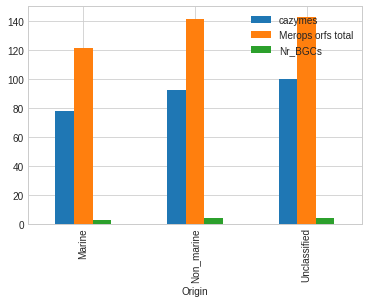

In [95]:
merge.groupby("Origin")["cazymes","Merops orfs total", "Nr_BGCs"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Origin'>

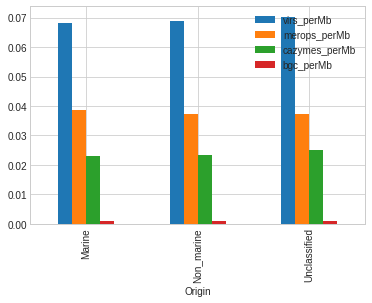

In [123]:
merge.groupby("Origin")["virs_perMb","merops_perMb", "cazymes_perMb","bgc_perMb"].mean().plot(kind="bar")

<AxesSubplot:xlabel='MAG'>

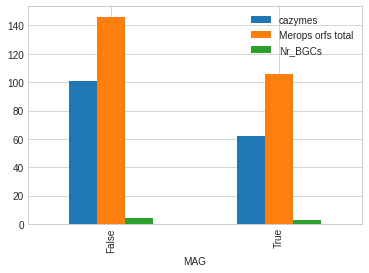

In [96]:
merge.groupby("MAG")["cazymes","Merops orfs total", "Nr_BGCs"].mean().plot(kind="bar")

<AxesSubplot:xlabel='MAG'>

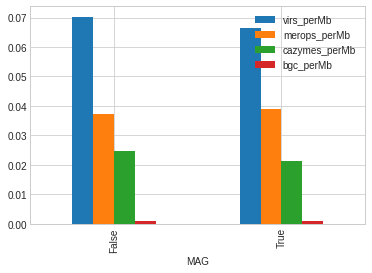

In [124]:
merge.groupby("MAG")["virs_perMb","merops_perMb", "cazymes_perMb", "bgc_perMb"].mean().plot(kind="bar")

# Plots per Genome Size

R^2: 0.5372911253321776
Intercept: [-36.63186765]
Slop: [[3.48836203e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


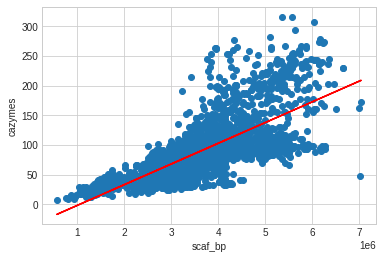

In [98]:

X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("cazymes")

plt.show()

R^2: 0.4184233180902047
Intercept: [-2.38036673]
Slop: [[1.65880883e-06]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


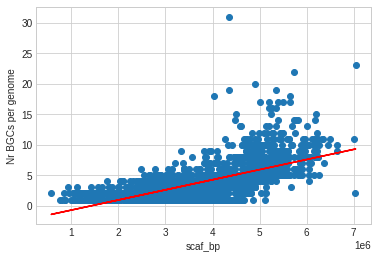

In [99]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Nr_BGCs"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.ylabel("Nr BGCs per genome")
plt.xlabel("scaf_bp")

plt.show()

R^2: 0.9332038979205894
Intercept: [-10.17160199]
Slop: [[7.24547202e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


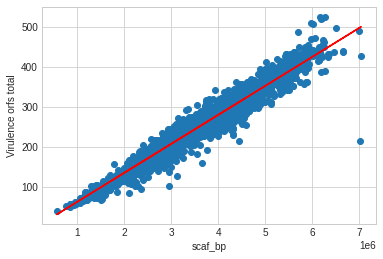

In [100]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.8018752301076578
Intercept: [15.33670694]
Slop: [[3.30298048e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


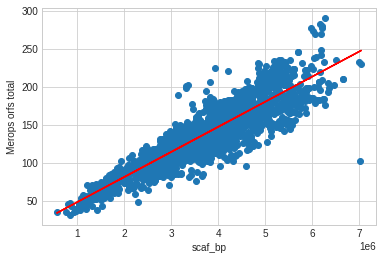

In [101]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("Merops orfs total")

plt.show()

R^2: 0.4389965750916346
Intercept: [-42.427749]
Slop: [[2.40960403e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


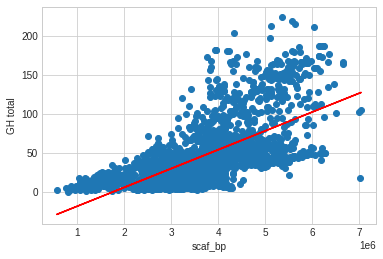

In [102]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["GH total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("GH total")

plt.show()

R^2: 0.4184233180902047
Intercept: [-2.38036673]
Slop: [[1.65880883e-06]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


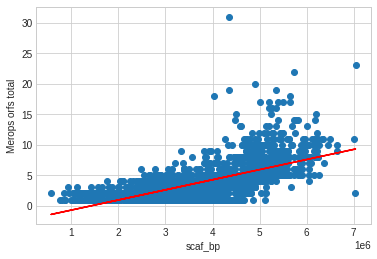

In [103]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Nr_BGCs"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("Merops orfs total")

plt.show()

# Others

R^2: 0.41982287568525134
Intercept: [184.57684512]
Slop: [[18.95060426]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


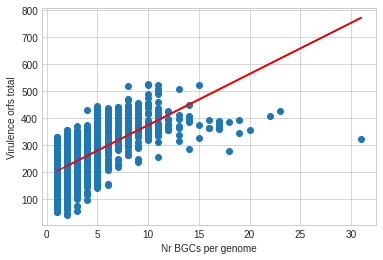

In [104]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.004814895415751974
Intercept: [1.25889542]
Slop: [[-0.00484336]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


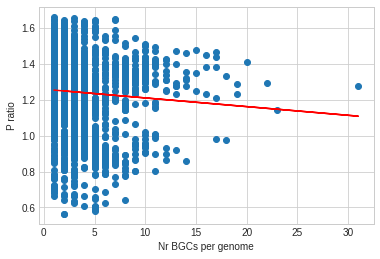

In [105]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("P ratio")

plt.show()

R^2: 0.0131103122046059
Intercept: [0.03665723]
Slop: [[1.06874793]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


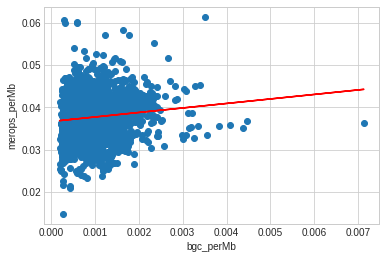

In [106]:
X = merge["bgc_perMb"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["merops_perMb"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("bgc_perMb")
plt.ylabel("merops_perMb")

plt.show()

R^2: 0.028550706669985715
Intercept: [0.06788756]
Slop: [[0.00037419]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


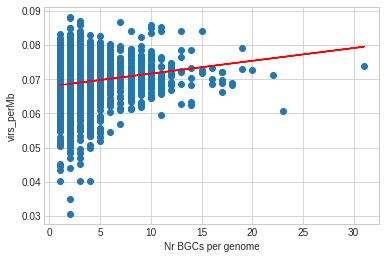

In [107]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["virs_perMb"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("virs_perMb")

plt.show()

R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


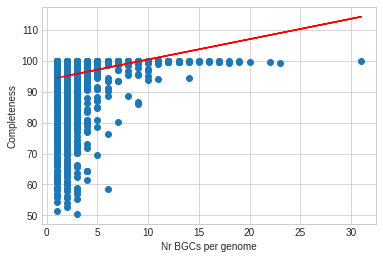

In [108]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

np.savetxt("foo.csv", X, delimiter=",")
np.savetxt("foo2.csv", Y, delimiter=",")

R^2: 0.0044075965724502675
Intercept: [6.850897e-05]
Slop: [[0.77708653]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


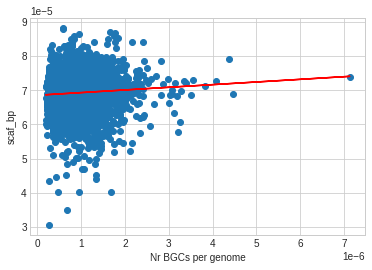

In [109]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = (merge["Virulence orfs total"]/merge["scaf_bp"]).values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()

R^2: 0.06063173432049507
Intercept: [3156729.66429253]
Slop: [[5.07508407e+11]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


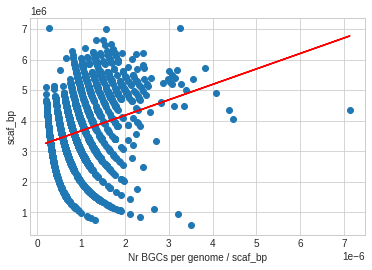

In [110]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome / scaf_bp")
plt.ylabel("scaf_bp")

plt.show()



R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


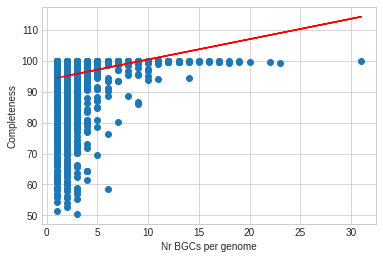

In [111]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

R^2: 0.43137725416365325
Intercept: [101.15017878]
Slop: [[9.44697639]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


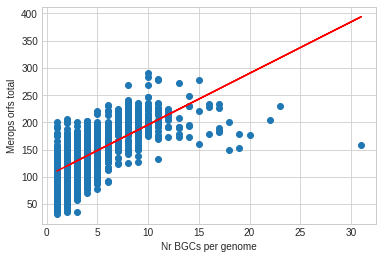

In [112]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Merops orfs total")

plt.show()

R^2: 0.12664635091486287
Intercept: [66.37992613]
Slop: [[6.60426755]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


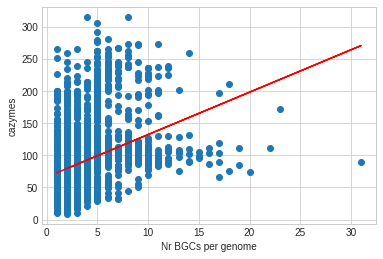

In [113]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("cazymes")

plt.show()

R^2: 0.26793255998628296
Intercept: [-0.08946069]
Slop: [[0.66784681]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


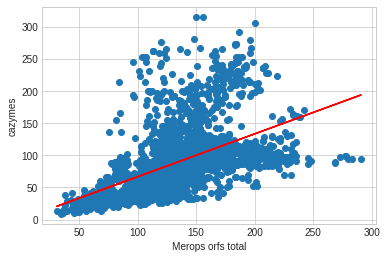

In [114]:
X = merge["Merops orfs total"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Merops orfs total")
plt.ylabel("cazymes")

plt.show()

R^2: 0.05791943184285542
Intercept: [7.49039038]
Slop: [[0.06855147]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


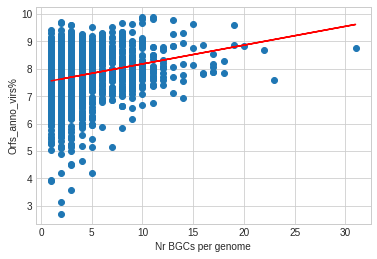

In [115]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Orfs_anno_virs%")

plt.show()

R^2: 0.06205382113770197
Intercept: [9.00371798]
Slop: [[-1.01656575]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


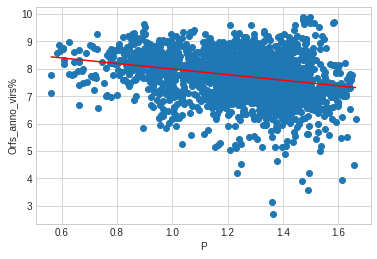

In [116]:
X = merge["P"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("P")
plt.ylabel("Orfs_anno_virs%")

plt.show()

## By Genus

In [117]:
merge2= merge.copy()
merge2= merge2.groupby("Genus").mean()
merge2.head()

cazymes  Orfs_anno_cazymes%         orfs  Merops orfs total  \
Genus                                                                          
AU392          53.000000            1.744574  3038.000000         200.500000   
Aequorivita    53.309524            1.796647  2958.714286         124.642857   
Algibacter    178.888889            4.441777  4080.777778         134.888889   
Algibacter_A  194.000000            5.806645  3341.000000         120.000000   
Algibacter_B  168.000000            4.933799  3359.200000         108.600000   

                GH total  Orfs_anno_merops%       scaf_bp  Completeness  \
Genus                                                                     
AU392          15.000000           6.599673  3.336441e+06     99.100000   
Aequorivita     6.857143           4.210442  3.200450e+06     95.061429   
Algibacter    116.777778           3.347715  4.651915e+06     98.622222   
Algibacter_A   96.000000           3.591739  3.994770e+06     98.680000   
Algibacter_B   95.600000           3.254936  4.017717e+06     99.340000   

               Nr_BGCs  Virulence orfs total  Orfs_anno_virs%         P  \
Genus                                                                     
AU392         2.000000            294.000000         9.677391  1.581839   
Aequorivita   2.952381            229.452381         7.745143  1.404391   
Algibacter    1.777778            317.444444         7.893644  0.862163   
Algibacter_A  1.000000            284.000000         8.500449  0.764331   
Algibacter_B  1.200000            292.600000         8.696474  0.803135   

              BGCs/genomesize  merops_perMb  virs_perMb  bgc_perMb  
Genus                                                               
AU392            5.994559e-07      0.060093    0.088119   0.000599  
Aequorivita      9.272511e-07      0.038918    0.071624   0.000927  
Algibacter       3.800332e-07      0.029011    0.068208   0.000380  
Algibacter_A     2.503273e-07      0.030039    0.071093   0.000250  
Algibacter_B     3.119790e-07      0.027386    0.072920   0.000312

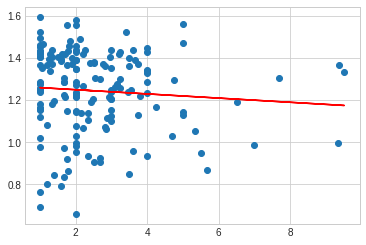

In [118]:
X = merge2["Nr_BGCs"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R^2: 0.2976850304979045
Intercept: [155.9918277]
Slop: [[25.8982655]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


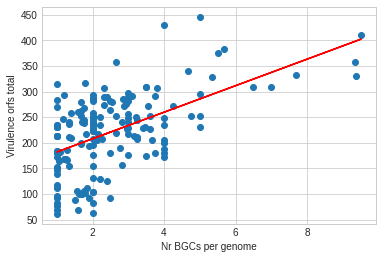

In [119]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.3075775654656361
Intercept: [2300047.10300126]
Slop: [[349251.99863498]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


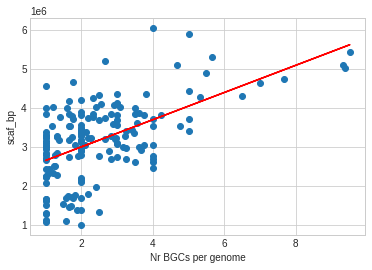

In [120]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()